In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
from pathlib import Path

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")


# Set figure parameters
fig_width = 3.25 #ECS spec is 3.25" width
fig_width_2col_inches = 7
fig_width_3col_inches = 10
fig_height = (3/4)*fig_width # standard ratio

rcParams['figure.autolayout'] = True
rcParams['lines.linewidth'] = 1.0
rcParams['font.size'] = 8
rcParams['font.sans-serif'] = 'Arial'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rcParams['lines.markersize'] = 5
rcParams['legend.fontsize'] = 7
rcParams['legend.frameon'] = False
rcParams['xtick.bottom'] = False
rcParams['ytick.direction'] = 'in' 



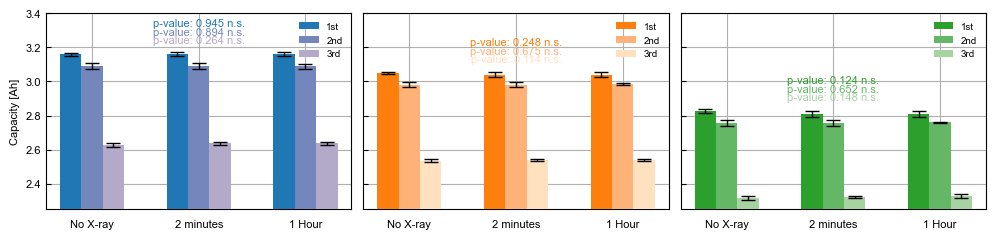

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

# 엑셀 파일 경로
file_path = 'capa_op_dataframe.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# 데이터를 c-rate, group 별로 나누기
c_rates = ['C/20', 'C/5', 'C/2']
groups = ['No X-ray', '2 minutes', '1 Hour']

# 색상 스킴
colors_1st = ['#1f77b4', '#ff7f0e', '#2ca02c'] 
colors_2nd = ['#7387bc', '#ffb278', '#63b765']  
colors_3rd = ['#b3a9c9', '#ffe1c0', '#a7d2a2']  

# 서브플롯 생성하기
fig, axes = plt.subplots(1, 3, figsize=(fig_width_3col_inches, fig_height), sharey=True)
bar_width = 0.2

for i, c_rate in enumerate(c_rates):
    subset = df[df['c-rate'] == c_rate]
    means_1st = subset[subset['order'] == '1st'].groupby('group')['capacity'].mean()
    means_2nd = subset[subset['order'] == '2nd'].groupby('group')['capacity'].mean()
    means_3rd = subset[subset['order'] == '3rd'].groupby('group')['capacity'].mean()
    errors_1st = subset[subset['order'] == '1st'].groupby('group')['capacity'].std()
    errors_2nd = subset[subset['order'] == '2nd'].groupby('group')['capacity'].std()
    errors_3rd = subset[subset['order'] == '3rd'].groupby('group')['capacity'].std()
    indices = np.arange(len(groups))

    axes[i].grid()  # 그리드 설정

    bars_1st = axes[i].bar(indices, means_1st[groups], bar_width, yerr=errors_1st[groups], label='1st', color=colors_1st[i], capsize=5, zorder=3)
    bars_2nd = axes[i].bar(indices + bar_width, means_2nd[groups], bar_width, yerr=errors_2nd[groups], label='2nd', color=colors_2nd[i], capsize=5, zorder=3)
    bars_3rd = axes[i].bar(indices + 2 * bar_width, means_3rd[groups], bar_width, yerr=errors_3rd[groups], label='3rd', color=colors_3rd[i], capsize=5, zorder=3)

    # P-value 계산하기
    no_xray_1st = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '1st')]['capacity']
    one_hour_1st = subset[(subset['group'] == '1 Hour') & (subset['order'] == '1st')]['capacity']
    p_value_1st = ttest_ind(no_xray_1st, one_hour_1st).pvalue

    no_xray_2nd = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '2nd')]['capacity']
    one_hour_2nd = subset[(subset['group'] == '1 Hour') & (subset['order'] == '2nd')]['capacity']
    p_value_2nd = ttest_ind(no_xray_2nd, one_hour_2nd).pvalue

    no_xray_3rd = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '3rd')]['capacity']
    one_hour_3rd = subset[(subset['group'] == '1 Hour') & (subset['order'] == '3rd')]['capacity']
    p_value_3rd = ttest_ind(no_xray_3rd, one_hour_3rd).pvalue

    # p-value에 따라 * 추가하기
    def significance_marker(p):
        if p < 0.001:
            return '***'
        elif p < 0.01:
            return '**'
        elif p < 0.05:
            return '*'
        else:
            return 'n.s.'

    sig_1st = significance_marker(p_value_1st)
    sig_2nd = significance_marker(p_value_2nd)
    sig_3rd = significance_marker(p_value_3rd)

    # 그래프에 P-value 추가하기
    axes[i].text(1 + bar_width, max(means_1st.max(), means_2nd.max(), means_3rd.max()) + 0.15, f'p-value: {p_value_1st:.3f} {sig_1st}', ha='center', va='bottom', color=colors_1st[i], zorder=5)
    axes[i].text(1 + bar_width, max(means_1st.max(), means_2nd.max(), means_3rd.max()) + 0.10, f'p-value: {p_value_2nd:.3f} {sig_2nd}', ha='center', va='bottom', color=colors_2nd[i], zorder=5)
    axes[i].text(1 + bar_width, max(means_1st.max(), means_2nd.max(), means_3rd.max()) + 0.05, f'p-value: {p_value_3rd:.3f} {sig_3rd}', ha='center', va='bottom', color=colors_3rd[i], zorder=5)

    axes[i].set_xticks(indices + bar_width)
    axes[i].set_xticklabels(groups)
    axes[i].set_ylim([2.25, 3.4])  # y축 범위 설정

    axes[i].legend()
    # axes[i].tick_params(axis='both', which='major', labelsize=15)
    if i == 0:
        axes[i].set_ylabel('Capacity [Ah]')

plt.tight_layout()
plt.show()

  order c-rate     group  Overpotential
0   1st   C/20  No X-ray         3.7081
1   1st   C/20  No X-ray         3.7091
2   1st   C/20  No X-ray         3.7060
3   1st   C/20  No X-ray         3.7038
4   1st   C/20  No X-ray         3.7050
group
1 Hour       3.70574
2 minutes    3.70574
No X-ray     3.70640
Name: Overpotential, dtype: float64
group
1 Hour       3.71600
2 minutes    3.71676
No X-ray     3.71676
Name: Overpotential, dtype: float64
group
1 Hour       3.77438
2 minutes    3.77506
No X-ray     3.77598
Name: Overpotential, dtype: float64
group
1 Hour       3.68254
2 minutes    3.68254
No X-ray     3.68444
Name: Overpotential, dtype: float64
group
1 Hour       3.69322
2 minutes    3.69370
No X-ray     3.69370
Name: Overpotential, dtype: float64
group
1 Hour       3.74546
2 minutes    3.74560
No X-ray     3.74664
Name: Overpotential, dtype: float64
group
1 Hour       3.61838
2 minutes    3.61838
No X-ray     3.62284
Name: Overpotential, dtype: float64
group
1 Hour       3.6270

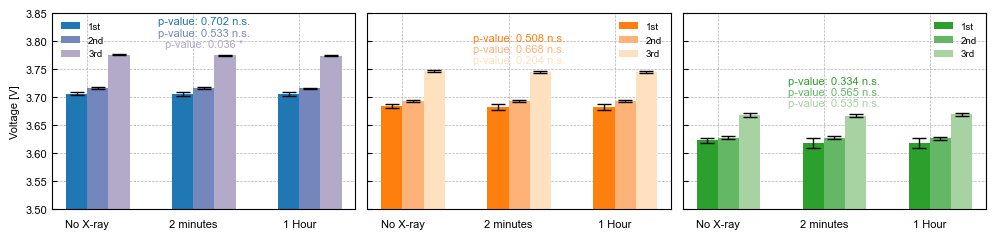

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

# 엑셀 파일 경로
file_path = 'capa_op_dataframe.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path, header=0, sheet_name='Sheet3')

# 데이터 확인
print(df.head())

# 데이터를 c-rate, group 별로 나누기
c_rates = ['C/20', 'C/5', 'C/2']
groups = ['No X-ray', '2 minutes', '1 Hour']

# 색상 스킴
colors_1st = ['#1f77b4', '#ff7f0e', '#2ca02c'] 
colors_2nd = ['#7387bc', '#ffb278', '#63b765']  
colors_3rd = ['#b3a9c9', '#ffe1c0', '#a7d2a2']  

# 서브플롯 생성하기
fig, axes = plt.subplots(1, 3, figsize=(fig_width_3col_inches, fig_height), sharey=True)
bar_width = 0.2

for i, c_rate in enumerate(c_rates):
    subset = df[df['c-rate'] == c_rate]
    means_1st = subset[subset['order'] == '1st'].groupby('group')['Overpotential'].mean()
    means_2nd = subset[subset['order'] == '2nd'].groupby('group')['Overpotential'].mean()
    means_3rd = subset[subset['order'] == '3rd'].groupby('group')['Overpotential'].mean()
    errors_1st = subset[subset['order'] == '1st'].groupby('group')['Overpotential'].std()
    errors_2nd = subset[subset['order'] == '2nd'].groupby('group')['Overpotential'].std()
    errors_3rd = subset[subset['order'] == '3rd'].groupby('group')['Overpotential'].std()
    print(means_1st)
    print(means_2nd)
    print(means_3rd)
    indices = np.arange(len(groups))

    # 그리드를 뒤로 보내기 위해 먼저 그리드 설정
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)

    bars_1st = axes[i].bar(indices, means_1st[groups], bar_width, yerr=errors_1st[groups], label='1st', color=colors_1st[i], capsize=5, zorder=2)
    bars_2nd = axes[i].bar(indices + bar_width, means_2nd[groups], bar_width, yerr=errors_2nd[groups], label='2nd', color=colors_2nd[i], capsize=5, zorder=2)
    bars_3rd = axes[i].bar(indices + 2 * bar_width, means_3rd[groups], bar_width, yerr=errors_3rd[groups], label='3rd', color=colors_3rd[i], capsize=5, zorder=2)

    # P-value 계산하기
    no_xray_1st = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '1st')]['Overpotential']
    one_hour_1st = subset[(subset['group'] == '1 Hour') & (subset['order'] == '1st')]['Overpotential']
    p_value_1st = ttest_ind(no_xray_1st, one_hour_1st).pvalue

    no_xray_2nd = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '2nd')]['Overpotential']
    one_hour_2nd = subset[(subset['group'] == '1 Hour') & (subset['order'] == '2nd')]['Overpotential']
    p_value_2nd = ttest_ind(no_xray_2nd, one_hour_2nd).pvalue

    no_xray_3rd = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '3rd')]['Overpotential']
    one_hour_3rd = subset[(subset['group'] == '1 Hour') & (subset['order'] == '3rd')]['Overpotential']
    p_value_3rd = ttest_ind(no_xray_3rd, one_hour_3rd).pvalue

    # p-value에 따라 * 추가하기
    def significance_marker(p):
        if p < 0.001:
            return '***'
        elif p < 0.01:
            return '**'
        elif p < 0.05:
            return '*'
        else:
            return 'n.s.'

    sig_1st = significance_marker(p_value_1st)
    sig_2nd = significance_marker(p_value_2nd)
    sig_3rd = significance_marker(p_value_3rd)

    # 그래프에 P-value 추가하기
    axes[i].text(1 + bar_width, max(means_1st.max(), means_2nd.max(), means_3rd.max()) + 0.05, f'p-value: {p_value_1st:.3f} {sig_1st}', ha='center', va='bottom', color=colors_1st[i], zorder=3)
    axes[i].text(1 + bar_width, max(means_1st.max(), means_2nd.max(), means_3rd.max()) + 0.03, f'p-value: {p_value_2nd:.3f} {sig_2nd}', ha='center', va='bottom', color=colors_2nd[i], zorder=3)
    axes[i].text(1 + bar_width, max(means_1st.max(), means_2nd.max(), means_3rd.max()) + 0.01, f'p-value: {p_value_3rd:.3f} {sig_3rd}', ha='center', va='bottom', color=colors_3rd[i], zorder=3)

    axes[i].set_xticks(indices + bar_width)
    axes[i].set_xticklabels(groups)
    axes[i].set_ylim([3.5, 3.85])  # y축 범위 설정

    axes[i].set_xticks(indices + bar_width / 2)
    axes[i].set_xticklabels(groups)
    axes[i].set_ylim([3.5, 3.85])  # y축 범위 설정
    # axes[i].grid(True)

    axes[i].legend()
    # axes[i].tick_params(axis='both', which='major', labelsize=15) 
    if i == 0:
        axes[i].set_ylabel('Voltage [V]')
    # axes[i].legend()

plt.tight_layout()
plt.show()

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


/var/folders/hk/78xx0y1n4ls1hfcyyxt37m3m0000gn/T/ipykernel_27182/1039896273.py:34: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='group', y='capacity', hue='order', data=subset, ax=axes[i],
/var/folders/hk/78xx0y1n4ls1hfcyyxt37m3m0000gn/T/ipykernel_27182/1039896273.py:34: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='group', y='capacity', hue='order', data=subset, ax=axes[i],
/var/folders/hk/78xx0y1n4ls1hfcyyxt37m3m0000gn/T/ipykernel_27182/1039896273.py:34: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='group', y='capacity', hue='order', data=subset, ax=axes[i],


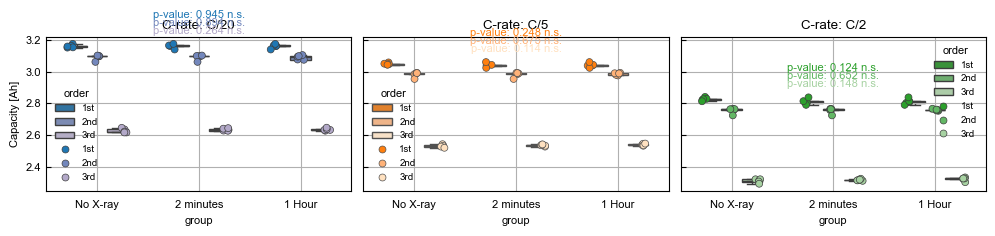

In [15]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# 엑셀 파일 경로
file_path = 'capa_op_dataframe.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# 데이터를 c-rate, group 별로 나누기
c_rates = ['C/20', 'C/5', 'C/2']
groups = ['No X-ray', '2 minutes', '1 Hour']

# 색상 스킴
colors_1st = ['#1f77b4', '#ff7f0e', '#2ca02c'] 
colors_2nd = ['#7387bc', '#ffb278', '#63b765']  
colors_3rd = ['#b3a9c9', '#ffe1c0', '#a7d2a2']  

# 서브플롯 생성하기
fig, axes = plt.subplots(1, 3, figsize=(fig_width_3col_inches, fig_height), sharey=True)

for i, c_rate in enumerate(c_rates):
    subset = df[df['c-rate'] == c_rate]
    
    # 박스플롯 그리기
    sns.boxplot(x='group', y='capacity', hue='order', data=subset, ax=axes[i],
                palette=[colors_1st[i], colors_2nd[i], colors_3rd[i]], width=0.6, showfliers=False, zorder=1)

    # 각 포인트 표시
    sns.stripplot(x='group', y='capacity', hue='order', data=subset, ax=axes[i],
                  palette=[colors_1st[i], colors_2nd[i], colors_3rd[i]], dodge=True, zorder=2, jitter=True, edgecolor='gray', linewidth=0.5)
    
    # P-value 계산하기
    no_xray_1st = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '1st')]['capacity']
    one_hour_1st = subset[(subset['group'] == '1 Hour') & (subset['order'] == '1st')]['capacity']
    p_value_1st = ttest_ind(no_xray_1st, one_hour_1st).pvalue

    no_xray_2nd = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '2nd')]['capacity']
    one_hour_2nd = subset[(subset['group'] == '1 Hour') & (subset['order'] == '2nd')]['capacity']
    p_value_2nd = ttest_ind(no_xray_2nd, one_hour_2nd).pvalue

    no_xray_3rd = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '3rd')]['capacity']
    one_hour_3rd = subset[(subset['group'] == '1 Hour') & (subset['order'] == '3rd')]['capacity']
    p_value_3rd = ttest_ind(no_xray_3rd, one_hour_3rd).pvalue

    # p-value에 따라 * 추가하기
    def significance_marker(p):
        if p < 0.001:
            return '***'
        elif p < 0.01:
            return '**'
        elif p < 0.05:
            return '*'
        else:
            return 'n.s.'

    sig_1st = significance_marker(p_value_1st)
    sig_2nd = significance_marker(p_value_2nd)
    sig_3rd = significance_marker(p_value_3rd)

    # 그래프에 P-value 추가하기
    axes[i].text(1, max(subset['capacity']) + 0.15, f'p-value: {p_value_1st:.3f} {sig_1st}', ha='center', va='bottom', color=colors_1st[i], zorder=5)
    axes[i].text(1, max(subset['capacity']) + 0.10, f'p-value: {p_value_2nd:.3f} {sig_2nd}', ha='center', va='bottom', color=colors_2nd[i], zorder=5)
    axes[i].text(1, max(subset['capacity']) + 0.05, f'p-value: {p_value_3rd:.3f} {sig_3rd}', ha='center', va='bottom', color=colors_3rd[i], zorder=5)

    axes[i].set_title(f'C-rate: {c_rate}')
    if i == 0:
        axes[i].set_ylabel('Capacity [Ah]')

    axes[i].grid(True)

plt.tight_layout()
plt.show()

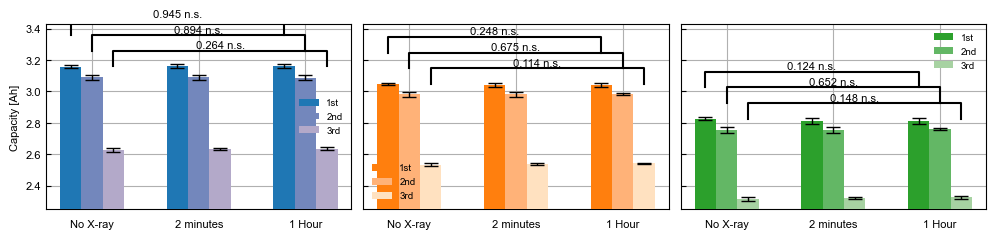

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

# 엑셀 파일 경로
file_path = 'capa_op_dataframe.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# 데이터를 c-rate, group 별로 나누기
c_rates = ['C/20', 'C/5', 'C/2']
groups = ['No X-ray', '2 minutes', '1 Hour']

# 색상 스킴
colors_1st = ['#1f77b4', '#ff7f0e', '#2ca02c'] 
colors_2nd = ['#7387bc', '#ffb278', '#63b765']  
colors_3rd = ['#b3a9c9', '#ffe1c0', '#a7d2a2']  

# 서브플롯 생성하기
fig, axes = plt.subplots(1, 3, figsize=(fig_width_3col_inches, fig_height), sharey=True)
bar_width = 0.2

for i, c_rate in enumerate(c_rates):
    subset = df[df['c-rate'] == c_rate]
    means_1st = subset[subset['order'] == '1st'].groupby('group')['capacity'].mean()
    means_2nd = subset[subset['order'] == '2nd'].groupby('group')['capacity'].mean()
    means_3rd = subset[subset['order'] == '3rd'].groupby('group')['capacity'].mean()
    errors_1st = subset[subset['order'] == '1st'].groupby('group')['capacity'].std()
    errors_2nd = subset[subset['order'] == '2nd'].groupby('group')['capacity'].std()
    errors_3rd = subset[subset['order'] == '3rd'].groupby('group')['capacity'].std()
    indices = np.arange(len(groups))

    axes[i].grid()  # 그리드 설정

    bars_1st = axes[i].bar(indices, means_1st[groups], bar_width, yerr=errors_1st[groups], label='1st', color=colors_1st[i], capsize=5, zorder=3)
    bars_2nd = axes[i].bar(indices + bar_width, means_2nd[groups], bar_width, yerr=errors_2nd[groups], label='2nd', color=colors_2nd[i], capsize=5, zorder=3)
    bars_3rd = axes[i].bar(indices + 2 * bar_width, means_3rd[groups], bar_width, yerr=errors_3rd[groups], label='3rd', color=colors_3rd[i], capsize=5, zorder=3)

    # P-value 계산하기
    no_xray_1st = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '1st')]['capacity']
    one_hour_1st = subset[(subset['group'] == '1 Hour') & (subset['order'] == '1st')]['capacity']
    p_value_1st = ttest_ind(no_xray_1st, one_hour_1st).pvalue

    no_xray_2nd = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '2nd')]['capacity']
    one_hour_2nd = subset[(subset['group'] == '1 Hour') & (subset['order'] == '2nd')]['capacity']
    p_value_2nd = ttest_ind(no_xray_2nd, one_hour_2nd).pvalue

    no_xray_3rd = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '3rd')]['capacity']
    one_hour_3rd = subset[(subset['group'] == '1 Hour') & (subset['order'] == '3rd')]['capacity']
    p_value_3rd = ttest_ind(no_xray_3rd, one_hour_3rd).pvalue

    # p-value에 따라 * 추가하기
    def significance_marker(p):
        if p < 0.001:
            return '***'
        elif p < 0.01:
            return '**'
        elif p < 0.05:
            return '*'
        else:
            return 'n.s.'

    sig_1st = significance_marker(p_value_1st)
    sig_2nd = significance_marker(p_value_2nd)
    sig_3rd = significance_marker(p_value_3rd)

    # P-value를 표시하는 선 (ㄷ자 모양) 그리기
    def add_bracket(ax, x1, x2, y, h, p_val, significance):
        """x1, x2: 두 막대 위치; y: y 위치; h: 선의 높이; p_val: p-value 값; significance: 유의성 표기"""
        ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, color='black')
        ax.text((x1 + x2) * 0.5, y + h, f'{p_val:.3f} {significance}', ha='center', va='bottom', color='black')

    # 유의성 막대 그리기
    max_height = max(means_1st.max(), means_2nd.max(), means_3rd.max())
    add_bracket(axes[i], 0, 2, max_height + 0.2, 0.1, p_value_1st, sig_1st)  # No X-ray vs 1 Hour (1st)
    add_bracket(axes[i], 0 + bar_width, 2 + bar_width, max_height + 0.1, 0.1, p_value_2nd, sig_2nd)  # No X-ray vs 1 Hour (2nd)
    add_bracket(axes[i], 0 + 2 * bar_width, 2 + 2 * bar_width, max_height, 0.1, p_value_3rd, sig_3rd)  # No X-ray vs 1 Hour (3rd)

    axes[i].set_xticks(indices + bar_width)
    axes[i].set_xticklabels(groups)
    axes[i].set_ylim([2.25, max_height + 0.6])  # y축 범위 설정

    axes[i].legend()
    if i == 0:
        axes[i].set_ylabel('Capacity [Ah]')

plt.tight_layout()
plt.show()

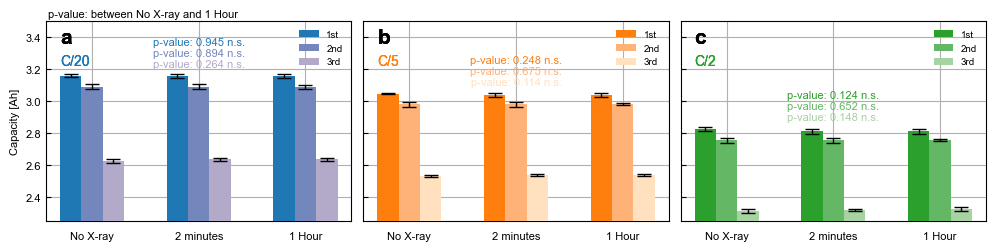

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

# 엑셀 파일 경로
file_path = 'capa_op_dataframe.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# 데이터를 c-rate, group 별로 나누기
c_rates = ['C/20', 'C/5', 'C/2']
groups = ['No X-ray', '2 minutes', '1 Hour']

# 색상 스킴
colors_1st = ['#1f77b4', '#ff7f0e', '#2ca02c'] 
colors_2nd = ['#7387bc', '#ffb278', '#63b765']  
colors_3rd = ['#b3a9c9', '#ffe1c0', '#a7d2a2']  

# 서브플롯 생성하기
fig, axes = plt.subplots(1, 3, figsize=(fig_width_3col_inches, fig_height), sharey=True)
bar_width = 0.2

for i, c_rate in enumerate(c_rates):
    subset = df[df['c-rate'] == c_rate]
    means_1st = subset[subset['order'] == '1st'].groupby('group')['capacity'].mean()
    means_2nd = subset[subset['order'] == '2nd'].groupby('group')['capacity'].mean()
    means_3rd = subset[subset['order'] == '3rd'].groupby('group')['capacity'].mean()
    errors_1st = subset[subset['order'] == '1st'].groupby('group')['capacity'].std()
    errors_2nd = subset[subset['order'] == '2nd'].groupby('group')['capacity'].std()
    errors_3rd = subset[subset['order'] == '3rd'].groupby('group')['capacity'].std()
    indices = np.arange(len(groups))

    axes[i].grid()  # 그리드 설정

    bars_1st = axes[i].bar(indices, means_1st[groups], bar_width, yerr=errors_1st[groups], label='1st', color=colors_1st[i], capsize=5, zorder=3)
    bars_2nd = axes[i].bar(indices + bar_width, means_2nd[groups], bar_width, yerr=errors_2nd[groups], label='2nd', color=colors_2nd[i], capsize=5, zorder=3)
    bars_3rd = axes[i].bar(indices + 2 * bar_width, means_3rd[groups], bar_width, yerr=errors_3rd[groups], label='3rd', color=colors_3rd[i], capsize=5, zorder=3)

    # P-value 계산하기
    no_xray_1st = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '1st')]['capacity']
    one_hour_1st = subset[(subset['group'] == '1 Hour') & (subset['order'] == '1st')]['capacity']
    p_value_1st = ttest_ind(no_xray_1st, one_hour_1st).pvalue

    no_xray_2nd = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '2nd')]['capacity']
    one_hour_2nd = subset[(subset['group'] == '1 Hour') & (subset['order'] == '2nd')]['capacity']
    p_value_2nd = ttest_ind(no_xray_2nd, one_hour_2nd).pvalue

    no_xray_3rd = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '3rd')]['capacity']
    one_hour_3rd = subset[(subset['group'] == '1 Hour') & (subset['order'] == '3rd')]['capacity']
    p_value_3rd = ttest_ind(no_xray_3rd, one_hour_3rd).pvalue

    # p-value에 따라 * 추가하기
    def significance_marker(p):
        if p < 0.001:
            return '***'
        elif p < 0.01:
            return '**'
        elif p < 0.05:
            return '*'
        else:
            return 'n.s.'

    sig_1st = significance_marker(p_value_1st)
    sig_2nd = significance_marker(p_value_2nd)
    sig_3rd = significance_marker(p_value_3rd)

    # 그래프에 P-value 추가하기
    axes[i].text(1 + bar_width, max(means_1st.max(), means_2nd.max(), means_3rd.max()) + 0.18, f'p-value: {p_value_1st:.3f} {sig_1st}', ha='center', va='bottom', color=colors_1st[i], zorder=5)
    axes[i].text(1 + bar_width, max(means_1st.max(), means_2nd.max(), means_3rd.max()) + 0.11, f'p-value: {p_value_2nd:.3f} {sig_2nd}', ha='center', va='bottom', color=colors_2nd[i], zorder=5)
    axes[i].text(1 + bar_width, max(means_1st.max(), means_2nd.max(), means_3rd.max()) + 0.04, f'p-value: {p_value_3rd:.3f} {sig_3rd}', ha='center', va='bottom', color=colors_3rd[i], zorder=5)

    axes[i].set_xticks(indices + bar_width)
    axes[i].set_xticklabels(groups)
    axes[i].set_ylim([2.25, 3.5])  # y축 범위 설정

    axes[i].legend()
    if i == 0:
        axes[i].set_ylabel('Capacity [Ah]')

# 그래프 왼쪽 상단에 설명 텍스트 추가
    axes[0].text(-0.1, 3.4, 'a', fontsize=15, fontweight='bold', ha='left', va='center')
    axes[1].text(-0.1, 3.4, 'b', fontsize=15, fontweight='bold', ha='left', va='center')
    axes[2].text(-0.1, 3.4, 'c', fontsize=15, fontweight='bold', ha='left', va='center')

    axes[0].text(-0.1, 3.25, 'C/20', color= '#1f77b4', fontsize=10, ha='left', va='center')
    axes[1].text(-0.1, 3.25, 'C/5', color= '#ff7f0e', fontsize=10, ha='left', va='center')
    axes[2].text(-0.1, 3.25, 'C/2', color= '#2ca02c', fontsize=10, ha='left', va='center')
plt.figtext(0.05, 1.0, 'p-value: between No X-ray and 1 Hour', fontsize=8, ha='left', va='top')

plt.tight_layout()
plt.show()

/var/folders/hk/78xx0y1n4ls1hfcyyxt37m3m0000gn/T/ipykernel_27182/4270724907.py:91: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


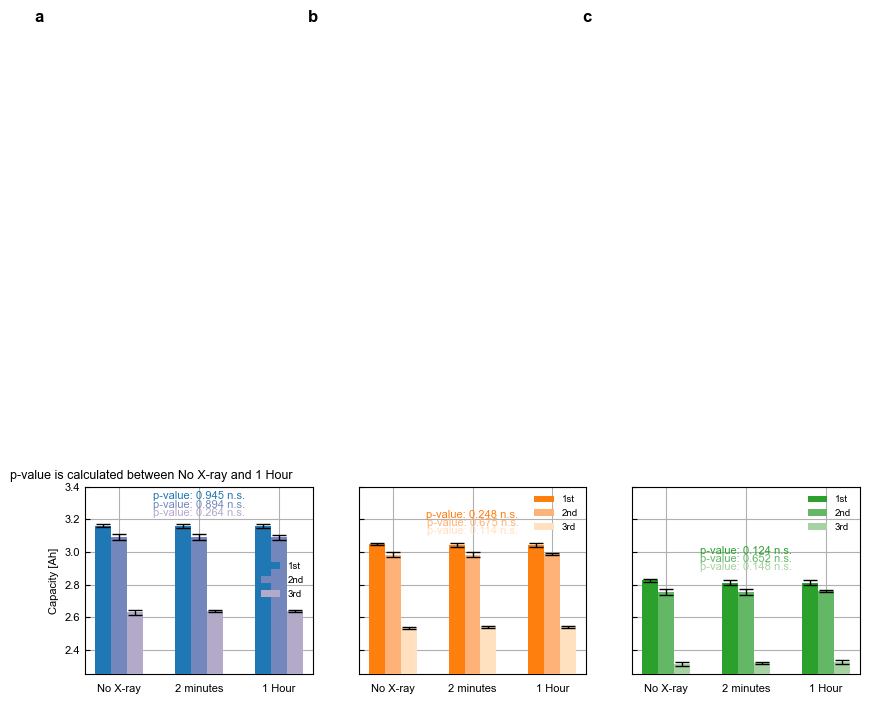

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

# 엑셀 파일 경로
file_path = 'capa_op_dataframe.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# 데이터를 c-rate, group 별로 나누기
c_rates = ['C/20', 'C/5', 'C/2']
groups = ['No X-ray', '2 minutes', '1 Hour']

# 색상 스킴
colors_1st = ['#1f77b4', '#ff7f0e', '#2ca02c'] 
colors_2nd = ['#7387bc', '#ffb278', '#63b765']  
colors_3rd = ['#b3a9c9', '#ffe1c0', '#a7d2a2']  

# 서브플롯 생성하기
fig, axes = plt.subplots(1, 3, figsize=(fig_width_3col_inches, fig_height), sharey=True)
bar_width = 0.2

# 각 서브플롯에 표시할 텍스트
subplot_labels = ['a', 'b', 'c']

for i, c_rate in enumerate(c_rates):
    subset = df[df['c-rate'] == c_rate]
    means_1st = subset[subset['order'] == '1st'].groupby('group')['capacity'].mean()
    means_2nd = subset[subset['order'] == '2nd'].groupby('group')['capacity'].mean()
    means_3rd = subset[subset['order'] == '3rd'].groupby('group')['capacity'].mean()
    errors_1st = subset[subset['order'] == '1st'].groupby('group')['capacity'].std()
    errors_2nd = subset[subset['order'] == '2nd'].groupby('group')['capacity'].std()
    errors_3rd = subset[subset['order'] == '3rd'].groupby('group')['capacity'].std()
    indices = np.arange(len(groups))

    axes[i].grid()  # 그리드 설정

    bars_1st = axes[i].bar(indices, means_1st[groups], bar_width, yerr=errors_1st[groups], label='1st', color=colors_1st[i], capsize=5, zorder=3)
    bars_2nd = axes[i].bar(indices + bar_width, means_2nd[groups], bar_width, yerr=errors_2nd[groups], label='2nd', color=colors_2nd[i], capsize=5, zorder=3)
    bars_3rd = axes[i].bar(indices + 2 * bar_width, means_3rd[groups], bar_width, yerr=errors_3rd[groups], label='3rd', color=colors_3rd[i], capsize=5, zorder=3)

    # P-value 계산하기
    no_xray_1st = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '1st')]['capacity']
    one_hour_1st = subset[(subset['group'] == '1 Hour') & (subset['order'] == '1st')]['capacity']
    p_value_1st = ttest_ind(no_xray_1st, one_hour_1st).pvalue

    no_xray_2nd = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '2nd')]['capacity']
    one_hour_2nd = subset[(subset['group'] == '1 Hour') & (subset['order'] == '2nd')]['capacity']
    p_value_2nd = ttest_ind(no_xray_2nd, one_hour_2nd).pvalue

    no_xray_3rd = subset[(subset['group'] == 'No X-ray') & (subset['order'] == '3rd')]['capacity']
    one_hour_3rd = subset[(subset['group'] == '1 Hour') & (subset['order'] == '3rd')]['capacity']
    p_value_3rd = ttest_ind(no_xray_3rd, one_hour_3rd).pvalue

    # p-value에 따라 * 추가하기
    def significance_marker(p):
        if p < 0.001:
            return '***'
        elif p < 0.01:
            return '**'
        elif p < 0.05:
            return '*'
        else:
            return 'n.s.'

    sig_1st = significance_marker(p_value_1st)
    sig_2nd = significance_marker(p_value_2nd)
    sig_3rd = significance_marker(p_value_3rd)

    # 그래프에 P-value 추가하기
    axes[i].text(1 + bar_width, max(means_1st.max(), means_2nd.max(), means_3rd.max()) + 0.15, f'p-value: {p_value_1st:.3f} {sig_1st}', ha='center', va='bottom', color=colors_1st[i], zorder=5)
    axes[i].text(1 + bar_width, max(means_1st.max(), means_2nd.max(), means_3rd.max()) + 0.10, f'p-value: {p_value_2nd:.3f} {sig_2nd}', ha='center', va='bottom', color=colors_2nd[i], zorder=5)
    axes[i].text(1 + bar_width, max(means_1st.max(), means_2nd.max(), means_3rd.max()) + 0.05, f'p-value: {p_value_3rd:.3f} {sig_3rd}', ha='center', va='bottom', color=colors_3rd[i], zorder=5)

    axes[i].set_xticks(indices + bar_width)
    axes[i].set_xticklabels(groups)
    axes[i].set_ylim([2.25, 3.4])  # y축 범위 설정

    # 서브플롯의 왼쪽 상단에 텍스트 추가 (a, b, c)
    axes[i].text(-0.2, 3.5, subplot_labels[i], fontsize=12, fontweight='bold', ha='center', va='center', transform=axes[i].transAxes)

    axes[i].legend()
    if i == 0:
        axes[i].set_ylabel('Capacity [Ah]')

# 그래프 왼쪽 상단에 설명 텍스트 추가
plt.figtext(0.05, 0.95, 'p-value is calculated between No X-ray and 1 Hour', fontsize=9, ha='left', va='top')

plt.tight_layout()
plt.show()